# Read and Visualize KML or KMZ data

"KML is a file format used to display geographic data in an Earth browser such as Google Earth. KML uses a tag-based structure with nested elements and attributes and is based on the XML standard." (https://developers.google.com/kml/documentation/kml_tut)

---
DTR

# Import Packages

In [2]:
import matplotlib.pyplot as plt

In [3]:
import pandas as pd

In [4]:
import cartopy
import cartopy.crs as ccrs
import cartopy.feature as cfeature

from cartopy.mpl.gridliner import LONGITUDE_FORMATTER, LATITUDE_FORMATTER

In [5]:
import cartopy.io.img_tiles as cimgt
#Note Stamen basemap will not be available from 31 Oct 2023

In [6]:
import geopandas as gpd

In [7]:
gpd.__version__

'0.13.2'

In [8]:
import fiona

In [9]:
fiona.__version__

'1.9.4'

**NB** The KML driver isn't enabled by default in Fiona as detailed in this github issue https://github.com/Toblerity/Fiona/issues/97. 

In [10]:
fiona.drvsupport.supported_drivers['kml'] = 'rw' # enable KML support which is disabled by default
fiona.drvsupport.supported_drivers['KML'] = 'rw' # enable KML support which is disabled by default

In [11]:
##gpd.io.file.fiona.drvsupport.supported_drivers['KML'] = 'rw'

In [12]:
import os

## Directory Management

In [13]:
os.getcwd()

'/media/donald/disk4nvme/GEOSPATIAL_DATA_READ_PROCESS'

In [14]:
dir_data = '/media/donald/disk10/DATA_GEOSPATIAL_SAT_READ/KML_KMZ/'
dir_data

'/media/donald/disk10/DATA_GEOSPATIAL_SAT_READ/KML_KMZ/'

In [15]:
# list the files in the directory
os.listdir(dir_data)

['Southampton_Surrondn.kml', 'Southampton_Surrondn.kmz']

change directory

In [16]:
os.chdir(dir_data)

In [17]:
os.getcwd()

'/media/donald/disk10/DATA_GEOSPATIAL_SAT_READ/KML_KMZ'

# Filename

In [18]:
fname_data = '/media/donald/disk10/DATA_GEOSPATIAL_SAT_READ/KML_KMZ/Southampton_Surrondn.kml'
fname_data

'/media/donald/disk10/DATA_GEOSPATIAL_SAT_READ/KML_KMZ/Southampton_Surrondn.kml'

# Read the data using geopandas

In [19]:
gdf_KML = gpd.read_file(fname_data, driver='KML')

In [20]:
gdf_KML

,Name,Description,geometry
0,Southampton_Surrondn,,"POLYGON Z ((-1.50541 50.48656 0.00000, -0.7251..."


## Quick plot

<Axes: >

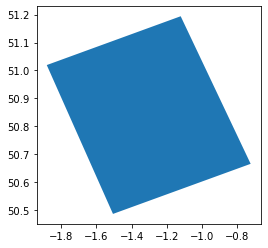

In [21]:
gdf_KML.plot()

# Plot using cartopy

In [22]:
stamen_terrain = cimgt.Stamen('terrain-background')
#Note Stamen basemap will not be available from 31 Oct 2023

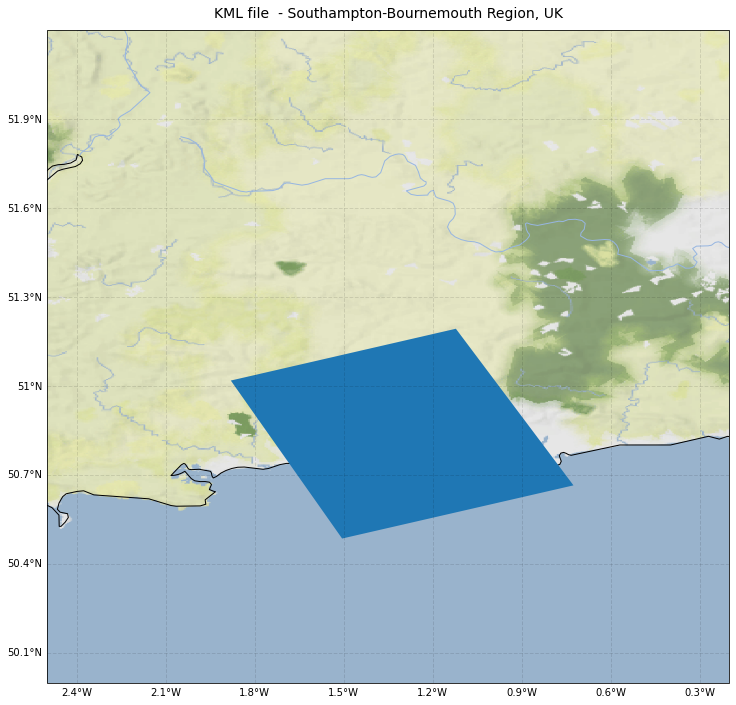

In [24]:
fig = plt.figure()
fig.set_size_inches(14, 12)
ax = fig.add_subplot(1, 1, 1, projection=ccrs.PlateCarree())
#set_extent(extents, crs=None)[source]
#Set the extent (x0, x1, y0, y1) of the map in the given coordinate system.
#If no crs is given, the extents’ coordinate system will be assumed to be the Geodetic
#version of this axes’ projection.
ax.set_extent([-2.5, -0.2, 50, 52.2], crs=ccrs.PlateCarree())
## add features
ax.add_feature(cfeature.LAND)
ax.add_feature(cfeature.OCEAN)
ax.add_feature(cfeature.COASTLINE)
ax.add_feature(cfeature.BORDERS, linestyle=':')
ax.add_feature(cfeature.LAKES, alpha=0.5)
ax.add_feature(cfeature.RIVERS)

### add background
ax.add_image(stamen_terrain, 8)

### add data

ax.add_geometries(gdf_KML["geometry"], crs=ccrs.PlateCarree())


##########
gl = ax.gridlines(crs=ccrs.PlateCarree(), draw_labels=True, linewidth=1, color="k", alpha=0.1, linestyle="--")
gl.top_labels = False
gl.right_labels = False
gl.xformatter = LONGITUDE_FORMATTER
gl.yformatter = LATITUDE_FORMATTER
#gl.ylines = True
#gl.xlines = True

###

ax.set_title('KML file  - Southampton-Bournemouth Region, UK',
             fontsize = 14,
             y=1.01)


plt.show()